<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Classification_and_regression_metric_evaluation_tips_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Supervised**: `Metrics Evaluation`
---

In [7]:
# Importing libraries

# data manipulation
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# gg plot style
plt.style.use('ggplot')

# warnings
import warnings
warnings.filterwarnings('ignore')

#### **1. Classification**

Classification is about predicting the class labels given input data. There are many ways for measuring classification performance. Accuracy, confusion matrix, log-loss, and AUC-ROC are some of the most popular metrics. Precision-recall is a widely used metrics for classification problems.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Create dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=10)
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

# Define model
model = LogisticRegression()
# Fitting model
model.fit(X_train, y_train)
# Predict to test set
y_pred = model.predict(X_test)                  # the result is a class / target
y_proba = model.predict_proba(X_test)[:, 1]     # the result is a probability

**1.1 Confusion Matrix:** is a performance measurement for the machine learning classification problems where the output can be two or more classes. It is a table with combinations of predicted and actual values. It is extremely useful for measuring the Recall, Precision, Accuracy, and AUC-ROC curves.

- **True Positive**: We predicted positive and it's true.
- **True Negative**: We predicted negative and it's true.
- **False Positive (Type 1 Error)**: We predicted positive and it's false.
- **False Negative (Type 2 Error)**: We predicted negative and it's false.


In [2]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f'True positive: {tp}')
print(f'True negative: {tn}')
print(f'false positive: {fp}')
print(f'false negative: {fn}')


True positive: 133
True negative: 117
false positive: 34
false negative: 16


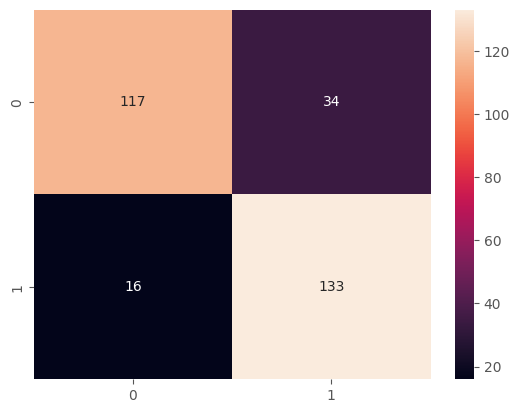

In [8]:
# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.show()

**1.2 Classification Report:** is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. It provides a better understanding of the overall performance of our trained model.

- **Accuracy**: It measures how many observations, both positive and negative, were correctly classified.
- **Recall**: It measures how many observations out of all positive observations have we classified as positive. It is a useful metrics in cases where False Negative is of higher concern than False Positive.
- **Precision**: It measures how many observations predicted as positive are in fact positive. Precision is useful in the cases where False Positive is of higher concern than False Negative.
- **F1-score**: It's the harmonic mean between precision and recall. It is useful where False Positive and False Negative are equally costly.
- **Macro-averaged**: All classes equally contribute to the final averaged metric.
- **Weighted-averaged**: Each classes's contribution to the average is weighted by its size


In [4]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# support is total data

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       151
           1       0.80      0.89      0.84       149

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



In [5]:
# Calculating precision, recall, f1
from sklearn.metrics import precision_score, recall_score, f1_score

print(f'precision: {precision_score(y_test, y_pred):3f}')
print(f'recall: {recall_score(y_test, y_pred):3f}')
print(f'f1: {f1_score(y_test, y_pred):3f}')

precision: 0.796407
recall: 0.892617
f1: 0.841772


**1.3 ROC Curve & AUC Score:** is a chart that visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR). Of course, the higher TPR and the lower FPR is for each threshold the better and so classifiers that have curves that are more top-left side are better.

Although the ROC Curve is a helpfull diagnostic tool, it can be challenging to compare two or more classifiers based on their curves. Instead, the area undeer the curve can be calculated to give a single score for a classifier model accross all threshold values. This is called the ROC area under curve or ROC AUC or sometimes ROC-AUC.


best threshold: 0.7498594375339794


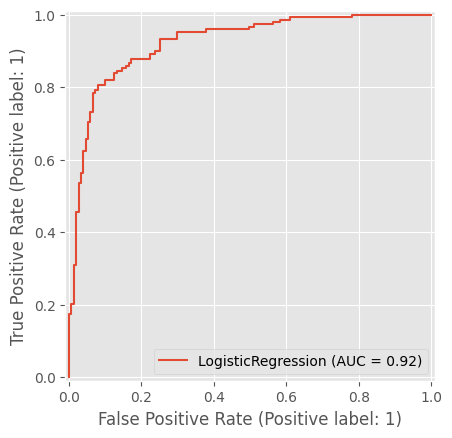

In [9]:
import numpy as np
from sklearn.metrics import roc_curve, RocCurveDisplay

fpr, tpr, threshold = roc_curve(y_test, y_proba)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print(f'best threshold: {threshold[ix]}')

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

**When to use it:**

- You should use it when you ultimately care about ranking predictions and not necessarily about outputting well-calibrated probabilities
- You should not use it when your data is heavily imbalanced. The intuition is the following: false positive rate for highly imbalanced datasets is pulled down due to a large number of true negatives.
- You should use it when you care equally about positive and negative classes.

**1.4 PR Curve:** is a curve that combines Precision and Recall in a single visualization. For every threshold, you calculate them and plot it. The higher on y-axis your curve is the better your model performance. You can use this plot to make an educated decision when it comes to the classic, precision/recall dilemma. Obviously, the higher the recall teh lower the precision. Knowing at which recall your precision starts to fall fast can help you choose the threshold and deliver a better model.

Similarly to ROC AUC score, you can calculate the Area Under the Precision-Recall Curve to get one number that describes model performance.


best threshold: 0.588


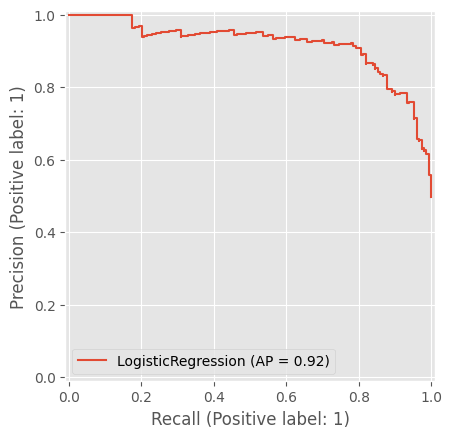

In [10]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, threshold = precision_recall_curve(y_test, y_proba)
fscore = 2 * precision * recall / (precision + recall)
ix = np.argmax(fscore)
print(f'best threshold: {threshold[ix]:.3f}') # when the f1-score is the largest

PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.show()

**When to use it:**

- when you want to communicate precision/recall decision to other stakeholders
- when you want to choose the threshold that fits the business problem
- when your data is heavily imbalanced. The intuition is the following: since PR AUC focuses mainly on the positive class (PPV and TPR) it cares less about the frequent negative class.
- when you care more about positive than negative class.

#### **2. Regression**

Since our model will produce an output given any input or set of inputs, we can then check these estimated outputs against the actual values that we tried to predict. We call the difference between the actual value and the model's estimate a residual. We can calculate the residual for every point in our data set and each of these residuals will be of use in assessment. The residuals will play a significant role in judging the usefulness of a model.

In [11]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create dataset
X, y = make_regression(n_samples=500, n_features=1, noise=20, random_state=42)

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

# Define model
model = LinearRegression()

# Fitting model
model.fit(X_train, y_train)

# Predict to test set
y_pred = model.predict(X_test)

**2.1 Mean Absolute Error:** is the most intuitive of the metrics since we're just looking at the absolute difference between the data and the model's prediction. Because we use the absolute value of the residual, the MAE does not indicate underperformance or overperformance of the model. Each residual contributes proportionally to the total amount of error, meaning that larger errors will contribute linearly to the overall error.

$$MAE = \frac{1}{n} \sum\limits_{i=1}^n |y_i - \hat{y}_i|$$


In [12]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred) # MAE is not sensitive to outliers in the residuals

17.03610538283118

**2.2 Mean Square Error:** is just like the MAE, but squares the difference before summing them all instead of using the absolute value. The effect of the square term in the MSE equation is most apparent with the presence of outliers in our data. While each residual in MAE contributes proportionally to the total error, the error grows quadratically in MSE. This ultimately means that outliers in our data will contribute to much higher total error in the MSE than they would the MAE. Similarly, our model will be penalized more for making predictions that differ greatly from the corresponding actual value.

$$MSE = \frac{1}{n} \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2$$


In [13]:
# Calculate MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred) # MSE is sensitive to outliers

455.3358686476294

In [17]:
# RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred)))

21.33860043788321


**2.3 Root Mean Square Error:** is the square root of the MSE. Because the MSE is squared, its units do not match that of the original output. Researchers will often use RMSE to convert the error metric back into similar units, making interpretation easier. Since the MSE and RMSE both square the residual, they are similarly affected by outliers. The RMSE is analogous to the standard deviation and is a measure of how large your residuals are spread out.

$$RMSE = \sqrt{\frac{1}{n} \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2}$$


In [18]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.3f}')

RMSE: 21.339


**2.4 Mean Absolute Percentage Error:** is the percentage equivalent of MAE. The equation looks just like that of MAE, but with adjustments to convert everything into percentages. Just as MAE is the average magnitude of error produced by your model, the MAPE is how far the model’s predictions are off from their corresponding outputs on average. Like MAE, MAPE also has a clear interpretation since percentages are easier for people to conceptualize. Both MAPE and MAE are robust to the effects of outliers thanks to the use of absolute value.

$$MAPE = \frac{1}{n} \sum\limits_{i=1}^n |\frac{y_i - \hat{y}_i}{y_i}|$$


In [19]:
# Calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred) # the error still has to be multiplied by 100 percent
# so it's really big 154%

1.547696458050968

**2.5 Root Mean Squared Percentage Error:** is the percentage equivalent of RMSE. The equation looks just like that of RMSE, but with adjustments to convert everything into percentages.

$$RMSPE = \sqrt{\frac{1}{n} \sum\limits_{i=1}^n (\frac{y_i - \hat{y}_i}{y_i})^2}$$


In [21]:
def root_mean_squared_percentage_error(y_true, y_pred):
    squared_percentage_error = np.square((y_true - y_pred)/y_true)
    mean_squared_percentage_error = np.mean(squared_percentage_error)
    rmspe = np.sqrt(mean_squared_percentage_error)
    return rmspe
print(root_mean_squared_percentage_error(y_test, y_pred))

# will penalize models with very large residuals
# so it will give a chance to models with small residuals

6.138045021643523


**2.6 Root Mean Squared Log Error:** is calculated by applying log to the actual and the predicted values and then taking their differences. RMSLE is robust to outliers where the small and large errors are treated evenly. It penalizes the model more if the predicted value is less than the actual value while the model is less penalized if the predicted value is more than the actual value. Hence the model has a large penalty for underestimation than overestimation. This can be helpful in situations where we are not bothered by overestimation but underestimation is not acceptable.

$$RMSLE = \sqrt{\frac{1}{n} \sum\limits_{i=1}^n (log(y_i + c) - log(\hat{y}_i + c))^2}$$


In [23]:
def root_mean_squared_log_error(y_true, y_pred, c=10):
    squared_log_error = np.square(np.log(y_true + c) - np.log(y_pred + c))
    mean_squared_log_error = np.mean(squared_log_error)
    rmsle = np.sqrt(mean_squared_log_error)
    return rmsle

print(root_mean_squared_log_error(y_test, y_pred, c=1000))



0.021415442775826566


**When to use it:**

All of the above measures deal directly with the residuals produced by our model. For each of them, we use the magnitude of the metric to decide if the model is performing well. Small error metric values point to good predictive ability, while large values suggest otherwise. That being said, it’s important to consider the nature of your data set in choosing which metric to present. Outliers may change your choice in metric, depending on if you’d like to give them more significance to the total error. Some fields may just be more prone to outliers, while others are may not see them so much. Remember that intuition we developed behind our metrics and apply them as needed.

#### **Scikit-learn Implementation**

**Importing Libraries**

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

### `Business Problem Understanding`

**Problem Statement**

Because tip amounts vary, determining an appropriate tip is crucial for employee well-being.

**Goals**

Determine the appropriate tip amount for each customer.

**Analytical Approach**

So, what we need to do is analyze the data to find patterns in the existing features that differentiate one customer from another.

Next, we will build a regression model that will help the company provide a tip prediction tool for new customers, which will be useful for improving employee well-being.

**Metric Evaluation**

The evaluation metrics that will be used are MSE and RMSE. The smaller the value of these two, the more accurate the model is in predicting tip prices according to the limitations of the features used.

Furthermore, we can also calculate the R-squared or adj. R-squared value to determine how well the model can represent the overall variance of the data. The closer it is to 1, the better the model fits the observed data. However, this metric is not valid for non-linear models.

### `Data Understanding`

In [25]:
# Load dataset
data = sns.load_dataset('tips')

display(data.head())

print(f'''
Number of rows: {data.shape[0]}
Number of columns: {data.shape[1]}
      ''')



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



Number of rows: 244
Number of columns: 7
      


In [26]:
# Check the data type, null values, and unique values ​​of each column
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,total_bill,float64,0.0,False,229,"[16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.7..."
1,tip,float64,0.0,False,123,"[1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2.0, 3.12,..."
2,sex,category,0.0,False,2,"['Female', 'Male'] Categories (2, object): ['M..."
3,smoker,category,0.0,False,2,"['No', 'Yes'] Categories (2, object): ['Yes', ..."
4,day,category,0.0,False,4,"['Sun', 'Sat', 'Thur', 'Fri'] Categories (4, o..."
5,time,category,0.0,False,2,"['Dinner', 'Lunch'] Categories (2, object): ['..."
6,size,int64,0.0,False,6,"[2, 3, 4, 1, 6, 5]"


**Insight**

* The dataset consists of 243 rows and 7 columns.
* Numeric variables: total bill, tip, and size
* Categorical variables: sex, smoker, day, and time
* There are no missing values ​​in the data.

### `Data Preparation`

`Duplicates`

**Duplicated Value**

Detecting and calculating duplicated data

In [27]:
print(f"Total duplicated data: {data.duplicated().sum()}")
print(f"Percentage of duplicated data: {data.duplicated().sum()/len(data)*100:.2f}%")

Total duplicated data: 1
Percentage of duplicated data: 0.41%


As much as 0.41% of the data is indicated as duplicate, so remove one of them.

Handling data duplication:

In [28]:
data.drop_duplicates(keep='last', inplace=True, ignore_index=True)

`Missing Values`

Detecting and calculating missing values

<Axes: >

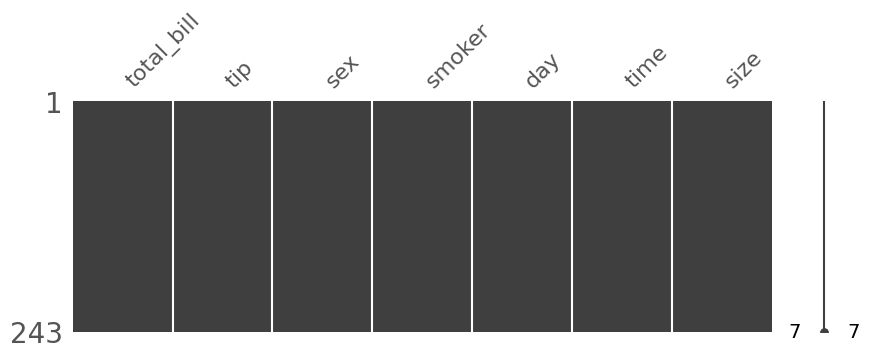

In [29]:
import missingno as msn

msn.matrix(data, figsize=(10,3))

In [30]:
pd.DataFrame({'missing values': [data[col].isna().sum() for col in data.columns]}, index=data.columns.values)

,missing values
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


There are no missing values.

`Outliers`

Outlier detection and quantification

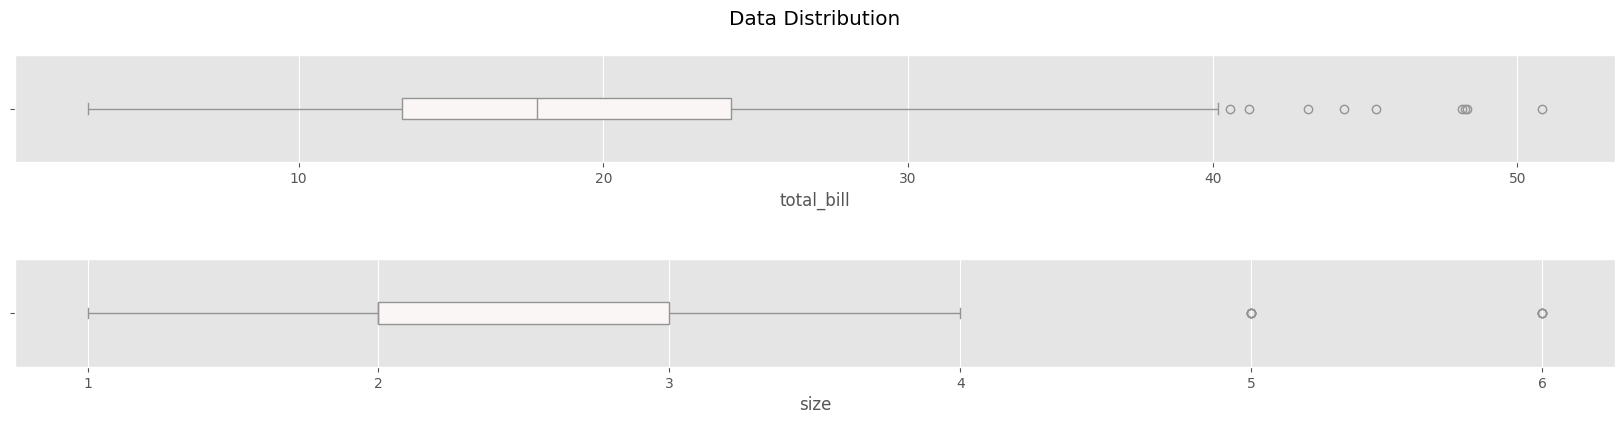

In [31]:
# Data distribution
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(20, 4))

sns.boxplot(x='total_bill', data=data, width=.2, palette="vlag", ax=ax[0])
sns.boxplot(x='size', data=data, width=.2, palette="vlag", ax=ax[1])

ax[0].set_title("Data Distribution", y=1.2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, wspace=0.1, hspace=0.9)
plt.show()


In [32]:
numerical = ['total_bill', 'size']

In [33]:
# Outlier detection
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(data, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(data[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,total_bill,9,3.7,-2.8125,40.3675
1,size,9,3.7,0.5000,4.5000


There are outliers of approximately 3.7% in the total_bill and size columns. For this case study, we'll leave them alone.

`Checking Multicollinearity`

Detecting multicollinearity between features with VIF.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_data = data[['total_bill', 'size']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numerical_data.values, i) for i in range(numerical_data.shape[1])]
vif["Feature"] =  numerical_data.columns

vif.round(2)

,VIF Factor,Feature
0,8.67,total_bill
1,8.67,size


There are indications of multicollinearity between the total_bill and size features, as their VIFs are between 4 and 10. Multicollinearity should be avoided when using a linear model. However, for this case study, we will maintain this.

**Feature Engineering**

Split the dataset into train and test sets.

In [35]:
from sklearn.model_selection import train_test_split

# define features and target
X = data.drop(columns=['tip'])
y = data['tip']

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 0
)

X_train.shape, X_test.shape

((194, 6), (49, 6))

### `Model Experiment`

Setting basic parameters to initialize the experiment and create a transformation pipeline

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'day', 'time'])
], remainder='passthrough')

scaler = RobustScaler()

**Benchmark Model**

In [37]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# define the models
lasso = Lasso()
linreg = LinearRegression()
knn = KNeighborsRegressor()
dtree = DecisionTreeRegressor()

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
# Models
models = [lasso, linreg, knn, dtree]
# Create list to store result
mape_mean = []
mape_std = []
all_mape = []
model_name = []
# Find the best model
for model in models:
    model_pipeline = Pipeline([
        ('preprocessing', transformer),
        ('scaling', scaler),
        ('modeling', model)
    ])
    model_cv = cross_val_score(
        model_pipeline,
        X_train,
        y_train,
        cv=5,
        scoring='neg_mean_absolute_percentage_error'
    )
    mape_mean.append(model_cv.mean())
    mape_std.append(model_cv.std())
    all_mape.append(model_cv.round(4))
    model_name.append(model.__class__.__name__)

In [39]:
# Error check
pd.DataFrame({
    'model': model_name,
    'mean': mape_mean,
    'std': mape_std,
    'all score': all_mape
})

,model,mean,std,all score
0,Lasso,-0.413548,0.064625,"[-0.4362, -0.3056, -0.4671, -0.3777, -0.4811]"
1,LinearRegression,-0.280511,0.040152,"[-0.2658, -0.2555, -0.3605, -0.262, -0.2588]"
2,KNeighborsRegressor,-0.301080,0.054454,"[-0.3165, -0.2876, -0.3925, -0.2253, -0.2835]"
3,DecisionTreeRegressor,-0.346000,0.085747,"[-0.3168, -0.2526, -0.5055, -0.3505, -0.3046]"


**Predict Benchmark Model to Test Set**

To measure the final performance of the model

In [40]:
from sklearn.metrics import mean_absolute_percentage_error
# Models
models = [lasso, linreg, knn, dtree]
# Create list to store result
mape_score = []
model_name = []
# Iterate for each model
for model in models:
    # Define pipeline
    model_pipeline = Pipeline([
        ('preprocessing', transformer),
        ('scaling', scaler),
        ('modeling', model)
    ])
    # Fitting to train set
    model_pipeline.fit(X_train, y_train)
    # Predict to test set
    y_pred_test = model_pipeline.predict(X_test)
    # Evaluate score
    mape = mean_absolute_percentage_error(y_test, y_pred_test)
    mape_score.append(mape)
    model_name.append(model.__class__.__name__)

In [41]:
pd.DataFrame({
    'model': model_name,
    'MAPE': mape_score
}).sort_values('MAPE', ascending=True)

,model,MAPE
2,KNeighborsRegressor,0.343793
1,LinearRegression,0.354319
3,DecisionTreeRegressor,0.396532
0,Lasso,0.436557


KNN was chosen as final model, even though it wasn't as good as linear regression in training, KNN was better in testing. In addition, the difference between training and testing wasn't that big even though there were still indications of overfitting.

**Insight**

-  Previously the best benchmark model, based on the analysis above, is 'Linear Regression':
    - On the train set, the average MAPE is quite small and the model is stable.
    - However, on the test set, the prediction result is 0.354 (far from the average value).
- Meanwhile, the KNN model's prediction result on the test set yields a MAPE of 0.343.
- This value is much better than the prediction result on the test set for the Linear Regression model.
- Furthermore, the value is also close to the average value on the train set.
- Therefore, we decided to use KNN as the best model, as it is more stable on both the train and test data.
- The next step is hyperparameter tuning.

**Hyperparameter Tuning**

In [42]:
# define hyperparameter space

param_grid = {
    'modeling__n_neighbors': range(3,30,2)
}

*Predict Tuned Model to Test Set*

In [43]:
from sklearn.model_selection import GridSearchCV
# Model Benchmark
knn = KNeighborsRegressor()
# Model Pipeline
knn_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('scaling', scaler),
    ('modeling', knn)
])
# Hyperparameter Tuning with GridSearch
tuned_model = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1
)
# Fitting to train set
tuned_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'day',
                                                                          'time'])])),
                                       ('scaling', RobustScaler()),
                                       ('modeling', KNeighborsRegressor())]),
             n_jobs=-1, param_grid={'modeling__n_neighbors': range(3, 30, 2)},
             scoring='neg_mean_absolute_percentage_error')

In [44]:
# best score
print(f'Best MAPE on train set: {tuned_model.best_score_:.3f}')

# best params
print(f'Best parameters: {tuned_model.best_params_}')

Best MAPE on train set: -0.293
Best parameters: {'modeling__n_neighbors': 15}


In [45]:
pd.DataFrame(tuned_model.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.010528,0.001214,0.006221,0.000724,15,{'modeling__n_neighbors': 15},-0.312064,-0.250371,-0.350980,-0.258393,-0.294881,-0.293338,0.036723,1
7,0.009347,0.000145,0.005513,0.000094,17,{'modeling__n_neighbors': 17},-0.316839,-0.253969,-0.352037,-0.267381,-0.299707,-0.297987,0.035083,2
5,0.011240,0.001271,0.006419,0.000681,13,{'modeling__n_neighbors': 13},-0.314621,-0.262417,-0.342884,-0.265753,-0.306153,-0.298366,0.030537,3
1,0.012653,0.000483,0.007080,0.000778,5,{'modeling__n_neighbors': 5},-0.316454,-0.287592,-0.392521,-0.225336,-0.283496,-0.301080,0.054454,4
2,0.011416,0.000667,0.006455,0.000469,7,{'modeling__n_neighbors': 7},-0.314181,-0.290246,-0.363862,-0.232044,-0.310060,-0.302078,0.042596,5
8,0.011976,0.002431,0.006192,0.000681,19,{'modeling__n_neighbors': 19},-0.326224,-0.251366,-0.349203,-0.276218,-0.309338,-0.302470,0.034917,6
4,0.011028,0.001041,0.007465,0.001078,11,{'modeling__n_neighbors': 11},-0.329302,-0.271381,-0.352994,-0.271927,-0.304762,-0.306073,0.031976,7
3,0.011895,0.000688,0.006686,0.000279,9,{'modeling__n_neighbors': 9},-0.332044,-0.282464,-0.359556,-0.263390,-0.307494,-0.308990,0.034274,8
9,0.009229,0.000341,0.005494,0.000168,21,{'modeling__n_neighbors': 21},-0.331737,-0.248395,-0.354278,-0.284474,-0.327069,-0.309191,0.037863,9
0,0.012504,0.002629,0.006933,0.000669,3,{'modeling__n_neighbors': 3},-0.329338,-0.254070,-0.408175,-0.271050,-0.306477,-0.313822,0.054031,10


In [46]:
# best estimator
tuned_model.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'day',
                                                   'time'])])),
                ('scaling', RobustScaler()),
                ('modeling', KNeighborsRegressor(n_neighbors=15))])

predict tuned model to test set

In [47]:
# define model
best_model = tuned_model.best_estimator_

# fitting to train set
best_model.fit(X_train, y_train)

# predict to test set
y_pred = best_model.predict(X_test)

# evaluate score
mean_absolute_percentage_error(y_test, y_pred)

0.3652352078531036

| Accuracy Score | Train Set | Test Set |
| --- | --- | --- |
| Before Tuning | 0.301 | 0.343 |
| After Tuning | 0.293 | 0.365 |

**Insight**

Model performance did not improve after tuning.

- MAPE before tuning on the test set: 33.9%
- MAPE after tuning on the test set: 36.5%

We can do further hyperparameter tuning or we can use the KNN model before tuning as the final model.